In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('used_cars_data.csv')
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### As S.No. is of no use so we will drop it

In [3]:
df.drop('S.No.',axis=1,inplace=True)

In [4]:
df[:3]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [5]:
df.shape

(7253, 13)

### checking null values

In [6]:

df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [7]:
#percentage of null values
df.isna().mean()*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [8]:
df.drop('New_Price',axis=1,inplace=True)

In [9]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.1+ KB


#### Here we can observe that there are 2 float , 2 int and 8 object columns

## Mileage

In [11]:
df[df['Mileage'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [12]:
# Checking for null values, we found that there are only 2 entries of this models which are also electric

df[(df['Mileage'].isna())|(df['Fuel_Type'] == 'Electric')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


Here we can see that there are only 2 missing values for Mileage and both are Electric vehicle, which have actually range of distance covered. so we can drop that rows


In [13]:
df.dropna(subset='Mileage',inplace=True)

In [14]:
# convert the values to float

df.Mileage = df.Mileage.str.replace('km/kg','').str.replace('kmpl','').astype(float)

In [15]:
df[:3]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50


In [16]:
df.Mileage.value_counts()

17.00    208
18.90    201
18.60    144
21.10    107
20.36    105
        ... 
17.09      1
19.91      1
17.16      1
18.23      1
17.15      1
Name: Mileage, Length: 438, dtype: int64

In [17]:
df.sort_values('Mileage')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.00,1086 CC,null bhp,5.0,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.00,999 CC,null bhp,5.0,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.00,1968 CC,null bhp,5.0,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.00,2179 CC,115 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54,998 CC,67.04 bhp,5.0,2.96
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54,998 CC,67.04 bhp,5.0,2.85
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54,998 CC,67.04 bhp,5.0,3.25
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998 CC,67.04 bhp,5.0,3.05


#### Mileage column also have entries with 0.0 mileage which need to be replaced

In [18]:
df.query("Mileage==0.0")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179 CC,115 bhp,5.0,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950 CC,194 bhp,5.0,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086 CC,null bhp,5.0,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498 CC,99 bhp,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,NaN
6697,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,0.0,1086 CC,null bhp,5.0,NaN
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179 CC,115 bhp,5.0,NaN
6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,0.0,1199 CC,88.7 bhp,NaN,NaN


In [19]:
df.Mileage.median()

18.16

In [20]:
# replace the 0.0 value with mean value
df.Mileage.replace({0.0:df.Mileage.median()},inplace=True)

In [21]:
df.query("Mileage==0.0")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


## Engine

In [22]:
#numeric = df[df.Engine.isna()]['Name'].str.extract(r'(\d+\.\d+)')[0].unique()

In [23]:
#for name in df.Name:
#    if '1.2' in name:
#        print(name)

In [24]:
#df[df.Name=='Honda City 1.5 V AT Sunroof']['Engine'].values[0]
#df.dropna(subset='Engine',inplace=True)

In [25]:
df.Engine.mode()

0    1197 CC
Name: Engine, dtype: object

In [26]:
df.Engine.fillna(df.Engine.mode()[0],inplace=True)

In [27]:
# extract only number and convert into int

df.Engine = df.Engine.str.strip(' CC').astype(int)

In [28]:
df[:3]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7 bhp,5.0,4.50


In [29]:
#mode = df[df.Engine.notnull()==True]['Engine'].str.strip(' CC').astype(int).mode()[0]
#mode

## Seats

In [30]:
df.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

Here we can see that Seats with 0 unique value, so we need to also deal with it by replacing it with mode

In [31]:
df.query("Seats==0")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197,null bhp,0.0,18.0


In [32]:
df.Seats = df.Seats.replace({0.0:5.0})

In [33]:
df.query("Seats==0")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [34]:
# filling NaN with mode of seats

df['Seats'] = df['Seats'].fillna(df.Seats.mode()[0])

In [35]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  46
Seats                   0
Price                1234
dtype: int64

## Power

In [36]:
df.Power.value_counts()

74 bhp        280
98.6 bhp      166
73.9 bhp      152
140 bhp       142
null bhp      129
             ... 
500 bhp         1
395 bhp         1
181.43 bhp      1
421 bhp         1
241.6 bhp       1
Name: Power, Length: 385, dtype: int64

#### With Nan Values the Power Column also have "null bhp" entry so we need to fill these both values

In [37]:
df[df.Power == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399,null bhp,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,18.16,1086,null bhp,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086,null bhp,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086,null bhp,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086,null bhp,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
6891,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59,1364,null bhp,5.0,NaN
6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364,null bhp,5.0,NaN
6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197,null bhp,5.0,NaN
7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086,null bhp,5.0,NaN


#### Replacing the null values and NaN with mode of the column

In [38]:
df.Power.mode()[0]

'74 bhp'

In [39]:
df.Power.fillna(df.Power.mode()[0],inplace=True)

In [40]:
df.Power.replace({'null bhp':df.Power.mode()[0]}, inplace=True)

In [41]:
df.Power

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
7248    103.6 bhp
7249    103.6 bhp
7250     63.1 bhp
7251    103.6 bhp
7252      170 bhp
Name: Power, Length: 7251, dtype: object

In [42]:
df.Power.isna().sum()

0

In [43]:
df[df.Power == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [44]:
# Extracting the numerical part and changging the dtype of Power

df.Power = df.Power.str.strip(' bhp').astype(float)

In [45]:
df[:3]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50


In [46]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7251 non-null   object 
 1   Location           7251 non-null   object 
 2   Year               7251 non-null   int64  
 3   Kilometers_Driven  7251 non-null   int64  
 4   Fuel_Type          7251 non-null   object 
 5   Transmission       7251 non-null   object 
 6   Owner_Type         7251 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7251 non-null   int32  
 9   Power              7251 non-null   float64
 10  Seats              7251 non-null   float64
 11  Price              6017 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 708.1+ KB


In [48]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int32
Power                float64
Seats                float64
Price                float64
dtype: object

In [49]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,7251.000000,7.251000e+03,7251.000000,7251.000000,7251.000000,7251.000000,6017.000000
mean,2013.365329,5.870229e+04,18.344444,1614.099710,111.845012,5.278444,9.478340
std,3.254604,8.443913e+04,4.134665,594.130458,53.176829,0.806766,11.189605
min,1996.000000,1.710000e+02,6.400000,624.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.400000,1197.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.344200e+04,18.160000,1462.000000,91.100000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000


In [50]:
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.187881,0.295573,-0.048804,0.038031,0.010527,0.305355
Kilometers_Driven,-0.187881,1.000000,-0.069413,0.094086,0.026098,0.090760,-0.011480
Mileage,0.295573,-0.069413,1.000000,-0.636807,-0.538309,-0.347695,-0.329977
Engine,-0.048804,0.094086,-0.636807,1.000000,0.854620,0.403389,0.657694
Power,0.038031,0.026098,-0.538309,0.854620,1.000000,0.099879,0.770681
Seats,0.010527,0.090760,-0.347695,0.403389,0.099879,1.000000,0.053824
Price,0.305355,-0.011480,-0.329977,0.657694,0.770681,0.053824,1.000000


In [90]:
df.to_csv('used_car_clean.csv')

In [51]:
df[:3]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50


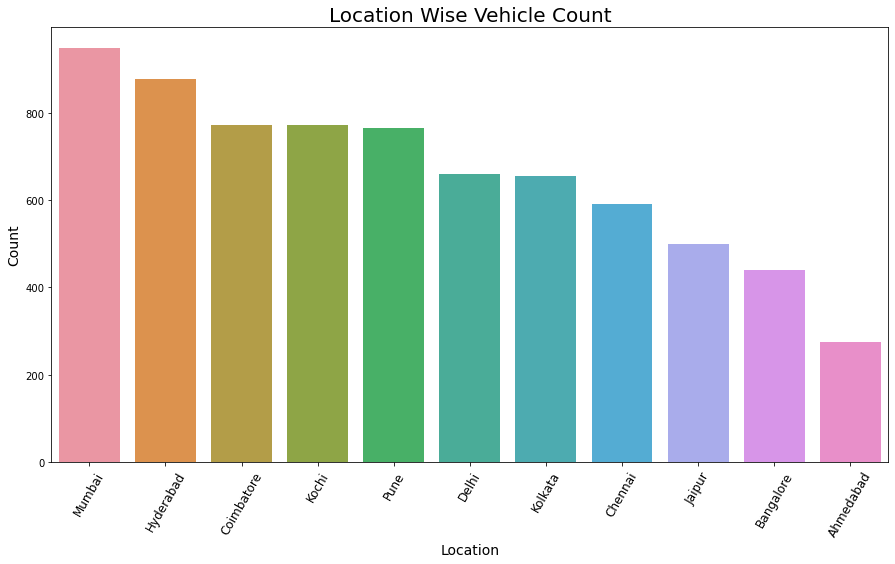

In [52]:
#Location wise distribution

plt.figure(figsize=(15,8))
sns.countplot(x='Location',data=df,order=df['Location'].value_counts().index)
plt.xlabel('Location',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=60,fontsize=12)
plt.title('Location Wise Vehicle Count',fontsize=20)
plt.show()

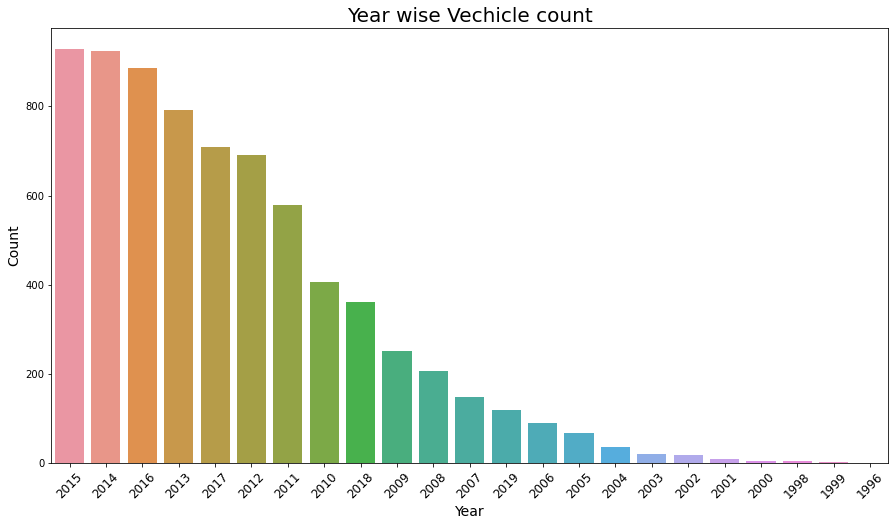

In [53]:
# Year wise distribution

plt.figure(figsize=(15,8))
sns.countplot(x='Year',data=df,order=df['Year'].value_counts().index)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.title('Year wise Vechicle count',fontsize=20)
plt.show()

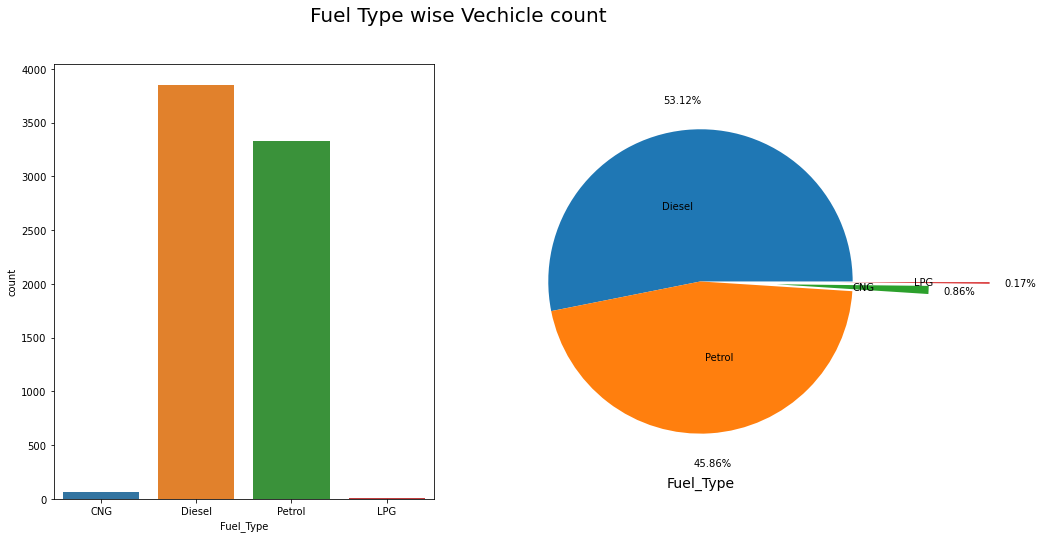

In [54]:
# Fuel Type

fig, ax = plt.subplots(1,2,figsize=(15,8))
plt.suptitle('Fuel Type wise Vechicle count',fontsize=20)

sns.countplot(ax=ax[0],x='Fuel_Type',data=df)
plt.xlabel('Fuel_Type',fontsize=14)


ax[1].pie(df['Fuel_Type'].value_counts(),labels=df['Fuel_Type'].value_counts().index,autopct='%.2f%%',explode=[0,0,0.5,0.9],labeldistance=0.5,pctdistance=1.2)

plt.show()

Most Vehicle are Diesel driven(53%), CNG(0.86%) And LPG(0.17%) driven are least.


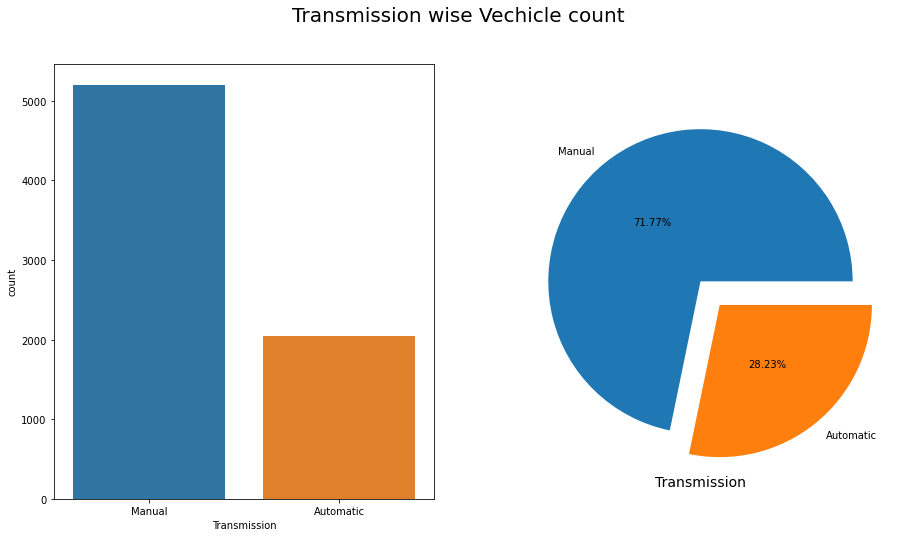

In [55]:
# Transmission Type

fig, ax = plt.subplots(1,2,figsize=(15,8))
plt.suptitle('Transmission wise Vechicle count',fontsize=20)

sns.countplot(ax=ax[0],x='Transmission',data=df)
plt.xlabel('Transmission',fontsize=14)

ax[1].pie(df['Transmission'].value_counts(),labels=df['Transmission'].value_counts().index,autopct='%.2f%%',explode=[0,0.2],labeldistance=1.1,pctdistance=0.5)

plt.show()

There ar around 72% of Vehicles with Manual Transmission, While only 28% are Automatic Transmission

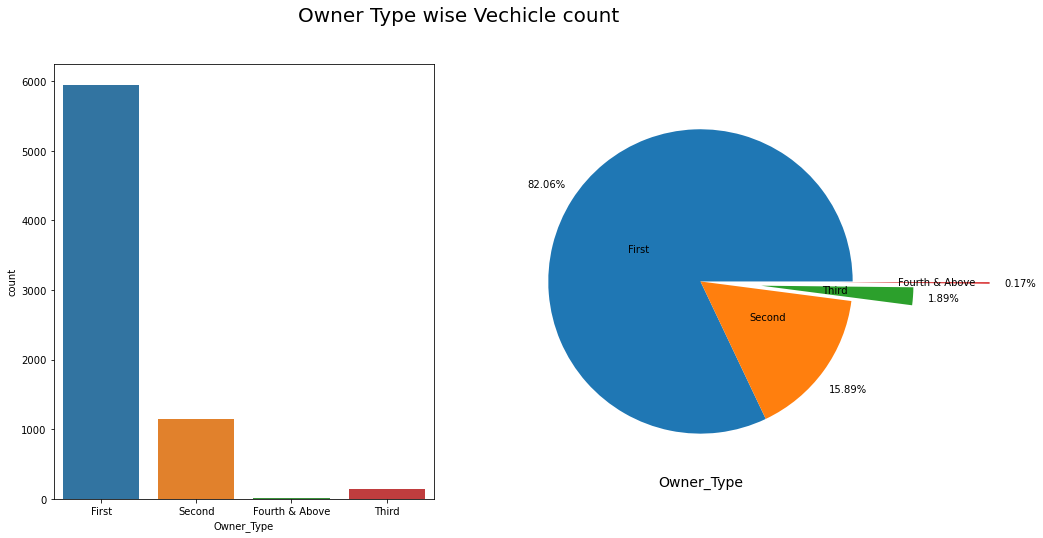

In [56]:
# Owner_Type

fig, ax = plt.subplots(1,2,figsize=(15,8))
plt.suptitle('Owner Type wise Vechicle count',fontsize=20)

sns.countplot(ax=ax[0],x='Owner_Type',data=df)
plt.xlabel('Owner_Type',fontsize=14)


ax[1].pie(df['Owner_Type'].value_counts(),labels=df['Owner_Type'].value_counts().index,autopct='%.2f%%',explode=[0,0,0.4,0.9],labeldistance=0.4,pctdistance=1.2
         )

plt.show()

In [57]:
df1 = df.copy()

### Dropping Price Column NaN  values

In [58]:
df1.dropna(inplace=True)
df1[:3]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50


## Dropping Name Column

In [59]:
df1 = df1.iloc[:,1:]
df1[:3]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50


In [60]:
final = pd.get_dummies(df1,drop_first=True)

In [61]:
X = final.drop(columns='Price')

In [62]:
y = final['Price']
y[:3]

0     1.75
1    12.50
2     4.50
Name: Price, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [65]:
model.fit(X_train,y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test)

In [67]:
model.score(X_test,y_test)*100

69.03522914414407

In [68]:
model.score(X_train,y_train)*100

69.88596933275937

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [70]:
mean_absolute_error(y_pred,y_test)

3.7117122913229674

In [71]:
mean_squared_error(y_pred,y_test)

36.33902571631333

In [72]:
from math import sqrt

sqrt(mean_squared_error(y_pred,y_test))

6.028185939095884

In [73]:
r2_score(y_pred,y_test)*100

58.587200107349304